In [5]:

import plantuml
from IPython.display import SVG, display
import requests


def show_plant(txt):
    plnt_txt = plantuml.deflate_and_encode(txt)
    uri = "http://www.plantuml.com/plantuml/svg/" + plnt_txt
    htmldata = requests.get(uri)
    svg_txt = htmldata.text
    style_idx = svg_txt.find("style=") + len("style=") + 1
    svg_txt = svg_txt[:style_idx]+"background-color: white;"+svg_txt[style_idx:]
    display(SVG(svg_txt))

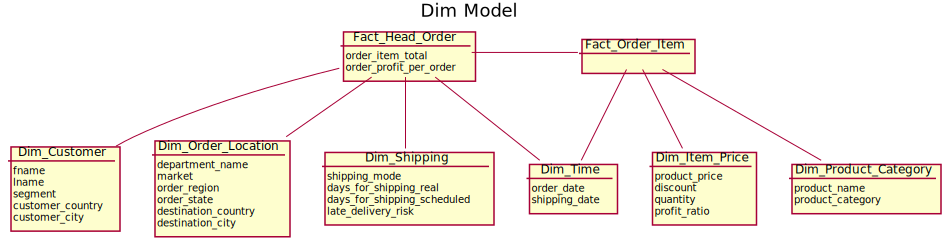

In [17]:
txt = """
title Dim Model


object Fact_Head_Order {
    order_item_total
    order_profit_per_order
}

object Fact_Order_Item {
}

object Dim_Customer {
    fname
    lname
    segment
    customer_country
    customer_city
}

object Dim_Item_Price {
    product_price
    discount
    quantity
    profit_ratio
}

object Dim_Product_Category {
    product_name
    product_category
}

object Dim_Order_Location {
    department_name
    market
    order_region
    order_state
    destination_country
    destination_city
}

object Dim_Time {
    order_date
    shipping_date
}

object Dim_Shipping {
    shipping_mode
    days_for_shipping_real
    days_for_shipping_scheduled
    late_delivery_risk
}

Fact_Head_Order -d- Dim_Customer
Fact_Head_Order -d- Dim_Order_Location
Fact_Head_Order -d- Dim_Time
Fact_Head_Order -d- Dim_Shipping

Fact_Head_Order -r- Fact_Order_Item

Fact_Order_Item -d- Dim_Item_Price
Fact_Order_Item -d- Dim_Product_Category
Fact_Order_Item -d- Dim_Time

 """



show_plant(txt)